# 인물사진을 만들어 보자

In [9]:
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1. 인물모드 직접 해 보기
* 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
* 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
* 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

### 1) 본인

나 (720, 1280, 3)


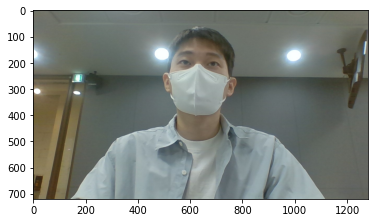

In [11]:
# 이미지 불러오기
img1_path = '/content/drive/MyDrive/AIFFEL/Exp/10/data/selfie.jpg'
img1 = cv2.imread(img1_path)

print('나', img1.shape)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# 모델 파일(.h5) 경로
model_file = '/content/drive/MyDrive/AIFFEL/Exp/10/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [13]:
# 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

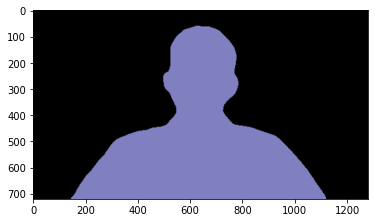

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [14]:
# 입력 이미지 'img1'에 대해 추론 (--> Segmentation)
segvalues, output = model.segmentAsPascalvoc(img1_path)

# 결과 확인
plt.imshow(output)
plt.show()

segvalues

In [15]:
# 클래스별 라벨 이름
# 'person'을 나타내는 라벨 = '15'
# 'dog'을 나타내는 라벨 = '12'
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [16]:
# 분할 시 사용되는 클래스별 색상 값 저장 (= 컬러맵)
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

In [17]:
# 'person' 색상 값 확인
colormap[15]

array([192, 128, 128])

In [18]:
# 채널 배치 변경 BGR --> RGB
seg_color = (128,128,192)

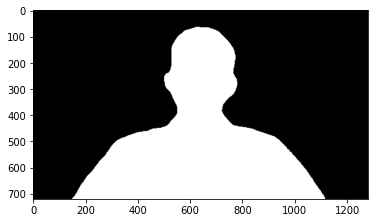

In [19]:
# 'person' 색상을 기준으로 마스크 생성
# 'person'인 것 = True
# 'person'이 아닌 것 = False
seg_map = np.all(output==seg_color, axis=-1)

plt.imshow(seg_map, cmap='gray')
plt.show()

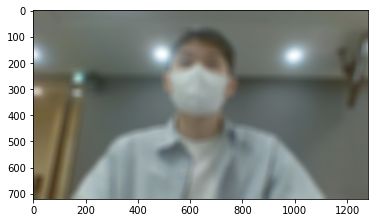

In [20]:
# Blurred 이미지 생성
img_blur = cv2.blur(img1, (30,30))
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

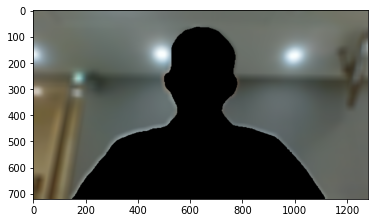

In [21]:
# (컬러 이미지와의 연산을 위해)
# Gray 스케일의 마스크를 컬러 이미지 스케일로 변경
# 즉, True과 False 값을 각각 255과 0으로 변환
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 마스크에 '0'을 입력하고,
img_bg_mask = cv2.bitwise_not(img_mask_color)
# Blurred 이미지와 'and' 연산하여
# 마스크를 제외한 Blurred 이미지, 즉 'person'을 제외하고 배경만 추출
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

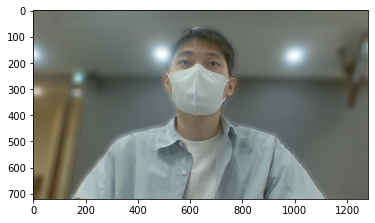

In [22]:
# 'person'을 제외한 Blurred 배경 이미지에 원본 이미지를 합성
img_concat = np.where(img_mask_color==255, img1, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 강아지

구찌 (1440, 1440, 3)


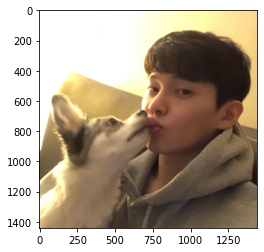

In [23]:
# 이미지 불러오기
img2_path = '/content/drive/MyDrive/AIFFEL/Exp/10/data/gujji.jpg'
img2 = cv2.imread(img2_path)

print('구찌', img2.shape)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

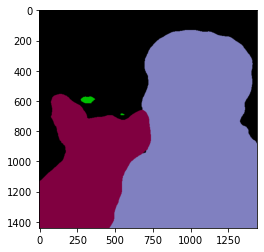

{'class_ids': array([ 0, 12, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [24]:
# 입력 이미지 'img2'에 대해 추론 (--> Segmentation)
segvalues, output = model.segmentAsPascalvoc(img2_path)

# 결과 확인
plt.imshow(output)
plt.show()

segvalues

In [25]:
# 'dog' 색상 값 확인
colormap[12]

array([ 64,   0, 128])

In [26]:
# 채널 배치 변경 BGR --> RGB
seg_color = (128,0,64)

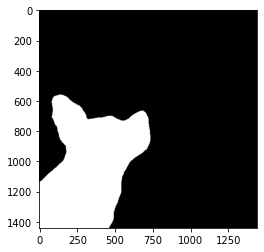

In [27]:
# 'dog' 색상을 기준으로 마스크 생성
seg_map = np.all(output==seg_color, axis=-1)

plt.imshow(seg_map, cmap='gray')
plt.show()

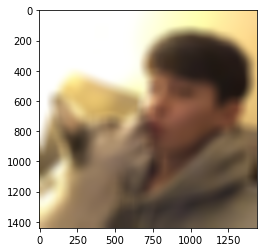

In [28]:
# Blurred 이미지 생성
img_blur = cv2.blur(img2, (80,80))
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

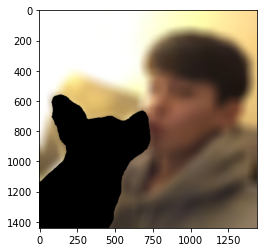

In [29]:
# (컬러 이미지와의 연산을 위해)
# Gray 스케일의 마스크를 컬러 이미지 스케일로 변경
# 즉, True과 False 값을 각각 255과 0으로 변환
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 마스크에 '0'을 입력하고,
img_bg_mask = cv2.bitwise_not(img_mask_color)
# Blurred 이미지와 'and' 연산하여
# 마스크를 제외한 Blurred 이미지, 즉 'dog'를 제외하고 배경만 추출
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

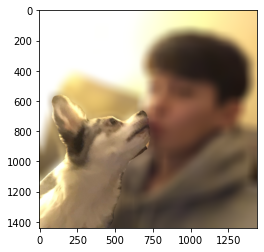

In [30]:
# 'dog'를 제외한 Blurred 배경 이미지에 원본 이미지를 합성
img_concat = np.where(img_mask_color==255, img2, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 3) 배경전환 크로마키

수지 (474, 550, 3)


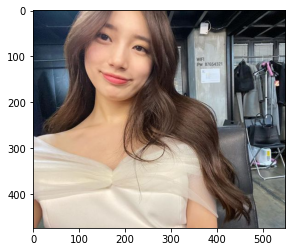

In [31]:
# 이미지 불러오기
img3_path = '/content/drive/MyDrive/AIFFEL/Exp/10/data/girlfriend.jpg'
img3 = cv2.imread(img3_path)

print('수지', img3.shape)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

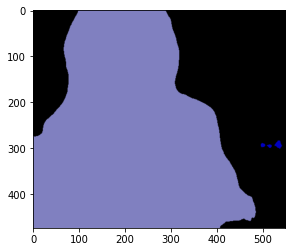

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [32]:
# 입력 이미지 'img3'에 대해 추론 (--> Segmentation)
segvalues, output = model.segmentAsPascalvoc(img3_path)

# 결과 확인
plt.imshow(output)
plt.show()

segvalues

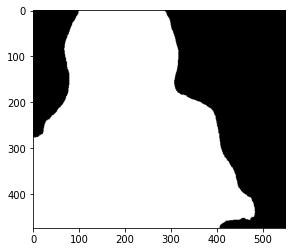

In [33]:
# 'person' 채널 배치 변경 BGR --> RGB
seg_color = (128,128,192)

# 'person' 색상을 기준으로 마스크 생성
seg_map = np.all(output==seg_color, axis=-1)

plt.imshow(seg_map, cmap='gray')
plt.show()

In [34]:
# (컬러 이미지와의 연산을 위해)
# Gray 스케일의 마스크를 컬러 이미지 스케일로 변경
# 즉, True과 False 값을 각각 255과 0으로 변환
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

꽃밭 (410, 567, 3)


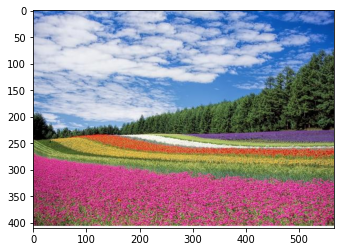

In [35]:
# 전환할 배경
img3bg_path = '/content/drive/MyDrive/AIFFEL/Exp/10/data/background.jpg'
img3bg = cv2.imread(img3bg_path)

print('꽃밭', img3bg.shape)
plt.imshow(cv2.cvtColor(img3bg, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
# 원본 이미지와의 합성을 위해 크기를 동일하게 resize
img3bg = cv2.resize(img3bg, (img3.shape[1], img3.shape[0]))

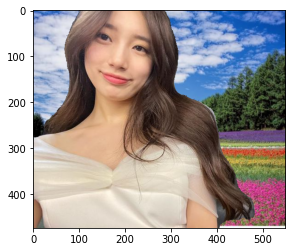

In [37]:
# 원본 이미지와 합성
img_concat = np.where(img_mask_color==255, img3, img3bg)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기

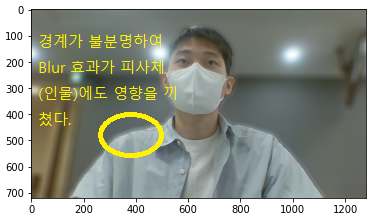

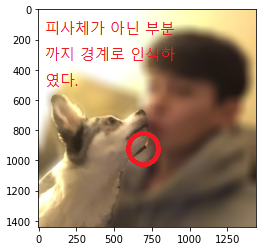

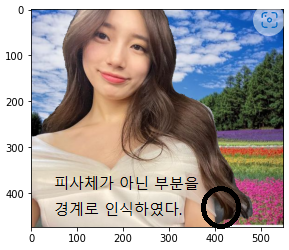

## Step 3. 해결 방법을 제안해 보기

위의 문제점들이 나타나는 원인는 사진이 '2D'라는 점에 있다. 따라서, 픽셀에 **depth** 정보를 넣어주면 Semantic segmentation의 정확성을 높일 수 있을 것이다.

--> 이미지의 depth를 예측해주는 *mono+stereo 640x192* 모델을 사용해 depth를 반영할 경우 경계의 부정확성이나 오차를 줄일 수 있을 것이다.



---



## 회고

*DeepLab v3+* 모델을 이용해 '아웃포커싱' 효과를 준 듯한 사진을 합성해보았다. 총 3가지, 1) 본인, 2) 강아지, 3) 배경전환 크로마키 사진들을 다뤘고 배경과 피사체를 분리해 Blur 효과를 주거나 배경 자체를 다른 사진으로 교체해 합성하는 것에 성공했다. 비교적 배경과 피사체가 단조로운 사진들을 사용했기 때문에 Semantic segmentation의 결과로부터 눈에 띌 만한 문제점을 발견하기 어려웠다. 경계의 부정확성 관련해 솔루션으로 제시했던 *mono+stereo 640x192 모델*을 직접 사용해볼 기회가 생겼으면 좋겠다.